## **GAZA**

The data contains the following columns:

* 'Date'
* 'Country'
* 'Country ISO'
* 'Admin'
* 'Latitude'
* 'Longitude'
* 'Geo Precision'
* 'Reported Perpetrator'
* 'Reported Perpetrator Name'
* 'Weapon Carried/Used'
* 'Food System Impact'
* 'All Food Security Categories'
* 'Event ID'
* 'Date Event Entered'
* 'Date Event Modified'

In [233]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [181]:
df = pd.read_csv('data/Foodsystems_impact.csv')
df.head(10)

,Date,Country,Country ISO,Admin 1,Latitude,Longitude,Geo Precision,Reported Perpetrator,Reported Perpetrator Name,Weapon Carried/Used,Food System Impact,All Food Security Categories,Event ID,Date Event Entered,Date Event Modified
0,30/9/2025,OPT,PSE,Gaza Strip,"31,46959259","34,43115108",(5) Linear feature e.g. along a road or river,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118871,16/10/2025,16/10/2025
1,30/9/2025,OPT,PSE,Gaza Strip,"31,45195058","34,41072475",(5) Linear feature e.g. along a road or river,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118874,16/10/2025,16/10/2025
2,29/9/2025,OPT,PSE,Gaza Strip,"31,2830204","34,2805069","(3) District, Municipality or Commune",Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118734,13/10/2025,14/10/2025
3,29/9/2025,OPT,PSE,Gaza Strip,"31,4851626","34,4146933",(2) 25 km precision,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118897,16/10/2025,16/10/2025
4,28/9/2025,OPT,PSE,Gaza Strip,"31,3084659","34,2865698",(5) Linear feature e.g. along a road or river,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118694,12/10/2025,12/10/2025
5,26/9/2025,OPT,PSE,Gaza Strip,"31,3084659","34,2865698",(5) Linear feature e.g. along a road or river,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118693,12/10/2025,12/10/2025
6,26/9/2025,OPT,PSE,Gaza Strip,"31,29292744","34,24986744",(2) 25 km precision,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118735,13/10/2025,14/10/2025
7,7/4/2025,OPT,PSE,Gaza Strip,"31,35762911","34,26229312",(2) 25 km precision,Host Government: Military,Israeli Defence Forces,Aerial Bomb: Drone,"Food Supply, Aid Systems, People Carrying Out ...","Attack On Persons Carrying Out Food Activity, ...",95484,2/5/2025,18/9/2025
8,25/9/2025,OPT,PSE,Gaza Strip,"31,4586131","34,4442171",(5) Linear feature e.g. along a road or river,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118898,16/10/2025,16/10/2025
9,24/9/2025,OPT,PSE,Gaza Strip,"31,29292744","34,24986744",(2) 25 km precision,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118736,13/10/2025,14/10/2025


In [182]:
df.shape

(1005, 15)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          1005 non-null   object
 1   Country                       1005 non-null   object
 2   Country ISO                   1005 non-null   object
 3   Admin 1                       1005 non-null   object
 4   Latitude                      1005 non-null   object
 5   Longitude                     1005 non-null   object
 6   Geo Precision                 1005 non-null   object
 7   Reported Perpetrator          1005 non-null   object
 8   Reported Perpetrator Name     1005 non-null   object
 9   Weapon Carried/Used           1005 non-null   object
 10  Food System Impact            1005 non-null   object
 11  All Food Security Categories  992 non-null    object
 12  Event ID                      1005 non-null   int64 
 13  Date Event Entered

In [184]:
df['Date'].value_counts()

Date
25/10/2023    13
22/10/2023    12
9/6/2025      10
23/10/2023    10
24/10/2023    10
              ..
16/10/2023     1
24/9/2025      1
26/3/2025      1
7/4/2025       1
28/9/2025      1
Name: count, Length: 383, dtype: int64

In [185]:
df['Country'].value_counts()

Country
OPT    1005
Name: count, dtype: int64

In [186]:
df['Country ISO'].value_counts()


Country ISO
PSE    1005
Name: count, dtype: int64

In [187]:
df['Admin 1'].value_counts()

Admin 1
Gaza Strip    1005
Name: count, dtype: int64

In [188]:
df['Latitude'].value_counts()

Latitude
31,4178        32
31,4486        26
31,3443293     26
31,53560208    24
31,3191        24
               ..
31,53275035     1
31,30440512     1
31,37857399     1
31,5740039      1
31,5338797      1
Name: count, Length: 309, dtype: int64

In [189]:
df['Longitude'].value_counts()

Longitude
34,3503        32
34,3095897     26
34,3925        26
34,4470303     24
34,3401        24
               ..
34,28104534     1
34,47011075     1
34,28283771     1
34,24474954     1
34,4814         1
Name: count, Length: 324, dtype: int64

In [190]:
df['Geo Precision'].value_counts()

Geo Precision
(2) 25 km precision                              789
(3) District, Municipality or Commune             80
(5) Linear feature e.g. along a road or river     68
(7) Estimated sea/air coordinates                 60
(4) Province, State, Governorate                   8
Name: count, dtype: int64

In [191]:
df['Reported Perpetrator'].value_counts()

Reported Perpetrator
Host Government: Military    1001
Multiple                        4
Name: count, dtype: int64

In [192]:
df['Reported Perpetrator Name'].value_counts()

Reported Perpetrator Name
Israeli Defence Forces                                    1000
Israeli Defence Forces, US Military                          1
Beneficiaries, Israeli Defence Forces                        1
Criminal, Israeli Defence Forces                             1
Israeli Defence Forces, Palestinian Popular Committees       1
Israeli Defence Forces, Israeli settlers                     1
Name: count, dtype: int64

In [234]:
df['Weapon Carried/Used'].value_counts()

Weapon Carried/Used
Firearms                                        399
Aerial Bomb: Plane                              301
Aerial Bomb: Drone                               84
Artillery                                        68
Unspecified Explosive                            60
Shelling                                         32
No Information on the Weapon Used                18
Firearm: Boat                                     6
Other Weapon                                      6
Aerial Bomb: No Information on Platform Type      6
Missile                                           4
Arson                                             3
Sniper                                            3
SVIED                                             2
Firearms, No Information on the Weapon Used       2
Rocket                                            2
Not Applicable: No Direct Violence                2
UXO                                               1
Firearm: Drone                              

In [235]:
df['Food System Impact'].value_counts()

Food System Impact
Aid Systems                                                    452
Food Production                                                197
Food Supply                                                    171
People Carrying Out Food Activity                               95
Food Production, People Carrying Out Food Activity              22
Food Supply, Aid Systems, People Carrying Out Food Activity     20
Aid Systems, People Carrying Out Food Activity                  17
Not Applicable                                                  13
Food Supply, Food Production                                     8
Food Supply, People Carrying Out Food Activity                   5
Food Supply, Aid Systems                                         3
Energy Systems                                                   2
Name: count, dtype: int64

In [236]:
df['All Food Security Categories'].value_counts()

All Food Security Categories
Incident Affecting People Seeking Food Aid, Attack On Distribution Site                                                                                                                                                               348
Damage/Destruction Of Agricultural Land                                                                                                                                                                                               180
Attack On Persons Carrying Out Food Activity                                                                                                                                                                                           92
Attack On a Market/Restaurant/Supermarket/Bakery                                                                                                                                                                                       86
Attack On a Market/Restaurant/Super

In [237]:
df['Event ID'].value_counts()

Event ID
118871    1
118874    1
118734    1
118897    1
118694    1
         ..
44123     1
96530     1
96531     1
111325    1
111326    1
Name: count, Length: 1005, dtype: int64

In [238]:
df['Date Event Entered'].value_counts()

Date Event Entered
2025-03-13    95
2025-03-11    74
2025-08-26    69
2025-07-27    50
2025-05-03    42
              ..
2024-03-19     1
2025-04-23     1
2024-09-25     1
2023-11-30     1
2024-02-08     1
Name: count, Length: 132, dtype: int64

In [239]:
df['Date Event Modified'].value_counts()

Date Event Modified
2025-09-18    373
2025-09-23     59
2025-08-26     50
2025-07-13     49
2025-07-27     47
             ... 
2025-07-08      1
2025-05-22      1
2025-06-28      1
2025-09-28      1
2025-06-25      1
Name: count, Length: 64, dtype: int64

In [240]:
# Date

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['Week'] = df['Date'].dt.isocalendar().week
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Day_Name'] = df['Date'].dt.strftime('%A')
df['Quarter'] = df['Date'].dt.quarter
df['Days_Since_Start'] = (df['Date'] - df['Date'].min()).dt.days

In [244]:
df['Latitude_clean'] = df['Latitude'].round(4)
df['Latitude_clean'].head()

0    31.4696
1    31.4520
2    31.2830
3    31.4852
4    31.3085
Name: Latitude_clean, dtype: float64

In [247]:
df['Longitude_clean'] = df['Longitude'].round(4)
df['Longitude_clean'].head()

0    34.4312
1    34.4107
2    34.2805
3    34.4147
4    34.2866
Name: Longitude_clean, dtype: float64

In [248]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'], yearfirst=True)

In [249]:
df['Date Event Entered'] = pd.to_datetime(df['Date Event Entered'])
df['Date'] = pd.to_datetime(df['Date'], yearfirst=True)

In [250]:
df['Date Event Modified'] = pd.to_datetime(df['Date Event Modified'])
df['Date'] = pd.to_datetime(df['Date'], yearfirst=True)

In [251]:
#PONERLO DE FORMA MÁS ELEGANTE
df['Geo Precision_clean'] = df['Geo Precision'].str.replace('(2) ','').str.replace('(3) ','').str.replace('(4) ','').str.replace('(5) ','').str.replace('(7) ','')
#df['Geo Precision_clean'].unique()
#Siguiendo el ejemplo de: https://www.geeksforgeeks.org/machine-learning/ml-label-encoding-of-datasets-in-python/
le = LabelEncoder()
df['Geo Precision_encoded'] = le.fit_transform(df['Geo Precision_clean'])
for i, categoria in enumerate(le.classes_):
    print(f"  {categoria}: {i}")

  25 km precision: 0
  District, Municipality or Commune: 1
  Estimated sea/air coordinates: 2
  Linear feature e.g. along a road or river: 3
  Province, State, Governorate: 4


In [252]:
df['Weapon Carried/Used_clean'] = df['Weapon Carried/Used'].str.replace('Firearm: Drone','Firearm').str.replace('Firearm: Boat','Firearm').str.replace('Firearms, Unarmed Perpetrator','Firearm').str.replace('Firearms, No Information on the Weapon Used','Firearm').str.replace('Firearms','Firearm').str.replace('Aerial Bomb: Drone','Aerial Bomb').str.replace('Aerial Bomb: Plane','Aerial Bomb').str.replace('Aerial Bomb: No Information on Platform Type','Aerial Bomb').str.replace('No Information on the Weapon Used','Other').str.replace('Unspecified Explosive','Other').str.replace('Other Weapon','Other').str.replace('Not Applicable: No Direct Violence','Other').str.replace('Shelling','Artillery')

df['Weapon Carried/Used_clean'].unique()

array(['Firearm', 'Aerial Bomb', 'Artillery', 'Other', 'UXO', 'Sniper',
       'Tanks', 'Hand Grenade', 'Missile', 'Rocket', 'SVIED', 'Arson',
       'Remote-controlled IED', 'Mine'], dtype=object)

In [253]:
df['Weapon Carried/Used_clean'] = df['Weapon Carried/Used'].str.replace('Firearm: Drone','Firearm').str.replace('Firearm: Boat','Firearm').str.replace('Firearms, Unarmed Perpetrator','Firearm').str.replace('Firearms, No Information on the Weapon Used','Firearm').str.replace('Firearms','Firearm').str.replace('Aerial Bomb: Drone','Aerial Bomb').str.replace('Aerial Bomb: Plane','Aerial Bomb').str.replace('Aerial Bomb: No Information on Platform Type','Aerial Bomb').str.replace('No Information on the Weapon Used','Other').str.replace('Unspecified Explosive','Other').str.replace('Other Weapon','Other').str.replace('Not Applicable: No Direct Violence','Other').str.replace('Shelling','Artillery')
df['Weapon Carried/Used_clean'].unique()
df['Weapon Carried/Used_encoded'] = le.fit_transform(df['Weapon Carried/Used_clean'])
for i, category in enumerate(le.classes_):
    print(f" {category}: {i}")

 Aerial Bomb: 0
 Arson: 1
 Artillery: 2
 Firearm: 3
 Hand Grenade: 4
 Mine: 5
 Missile: 6
 Other: 7
 Remote-controlled IED: 8
 Rocket: 9
 SVIED: 10
 Sniper: 11
 Tanks: 12
 UXO: 13


In [255]:
df['All Food Security Categories'].unique()

array(['Incident Affecting People Seeking Food Aid, Attack On Distribution Site',
       'Attack On Persons Carrying Out Food Activity, Attack On a Market/Restaurant/Supermarket/Bakery, Attack On Aid Workers Carrying Out Food-Related Programme, Incident Affecting People Seeking Food Aid, Attack On Distribution Site',
       'Attack On a Market/Restaurant/Supermarket/Bakery, Access Constraints, Attack On Aid Workers Carrying Out Food-Related Programme, Incident Affecting People Seeking Food Aid, Attack On Distribution Site',
       'Attack On a Market/Restaurant/Supermarket/Bakery',
       'Damage/Destruction Of Agricultural Land',
       'Attack On Aid Workers Carrying Out Food-Related Programme, Incident Affecting People Seeking Food Aid, Attack On Distribution Site',
       'Attack On Persons Carrying Out Food Activity',
       'Damage/Destruction Of Commercial Food Transport',
       'Attack On a Market/Restaurant/Supermarket/Bakery, Access Constraints',
       'Violence Affecting M

In [257]:
df_food = df[['Year','Month','Day','Latitude_clean','Longitude_clean','Geo Precision_encoded','Weapon Carried/Used_encoded','All Food Security Categories_encoded']]
print(df_food)

      Year  Month  Day  Latitude_clean  Longitude_clean  \
0     2025      9   30         31.4696          34.4312   
1     2025      9   30         31.4520          34.4107   
2     2025      9   29         31.2830          34.2805   
3     2025      9   29         31.4852          34.4147   
4     2025      9   28         31.3085          34.2866   
...    ...    ...  ...             ...              ...   
1000  2023     10    7         31.5282          34.4840   
1001  2023     10    7         31.5349          34.4667   
1002  2023     10    7         31.5541          34.5016   
1003  2023     10    7         31.5541          34.5016   
1004  2023     10    7         31.5349          34.4667   

      Geo Precision_encoded  Weapon Carried/Used_encoded  \
0                         3                            3   
1                         3                            3   
2                         1                            3   
3                         0                        

In [258]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  1005 non-null   int32  
 1   Month                                 1005 non-null   int32  
 2   Day                                   1005 non-null   int32  
 3   Latitude_clean                        1005 non-null   float64
 4   Longitude_clean                       1005 non-null   float64
 5   Geo Precision_encoded                 1005 non-null   int64  
 6   Weapon Carried/Used_encoded           1005 non-null   int64  
 7   All Food Security Categories_encoded  1005 non-null   int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 51.2 KB


In [259]:
df_food.describe()

,Year,Month,Day,Latitude_clean,Longitude_clean,Geo Precision_encoded,Weapon Carried/Used_encoded,All Food Security Categories_encoded
count,1005.000000,1005.000000,1005.000000,1005.00000,1005.000000,1005.000000,1005.000000,1005.000000
mean,2024.538308,6.727363,16.091542,31.42671,34.375474,0.433831,2.158209,27.865672
std,0.678185,2.597366,8.793083,0.09268,0.082830,0.931333,2.210047,14.172488
min,2023.000000,1.000000,1.000000,31.13150,34.161400,0.000000,0.000000,0.000000
25%,2024.000000,5.000000,9.000000,31.34010,34.293400,0.000000,0.000000,19.000000
50%,2025.000000,7.000000,16.000000,31.44820,34.392500,0.000000,3.000000,25.000000
75%,2025.000000,8.000000,24.000000,31.51290,34.450000,0.000000,3.000000,42.000000
max,2025.000000,12.000000,31.000000,31.58870,34.536100,4.000000,13.000000,49.000000


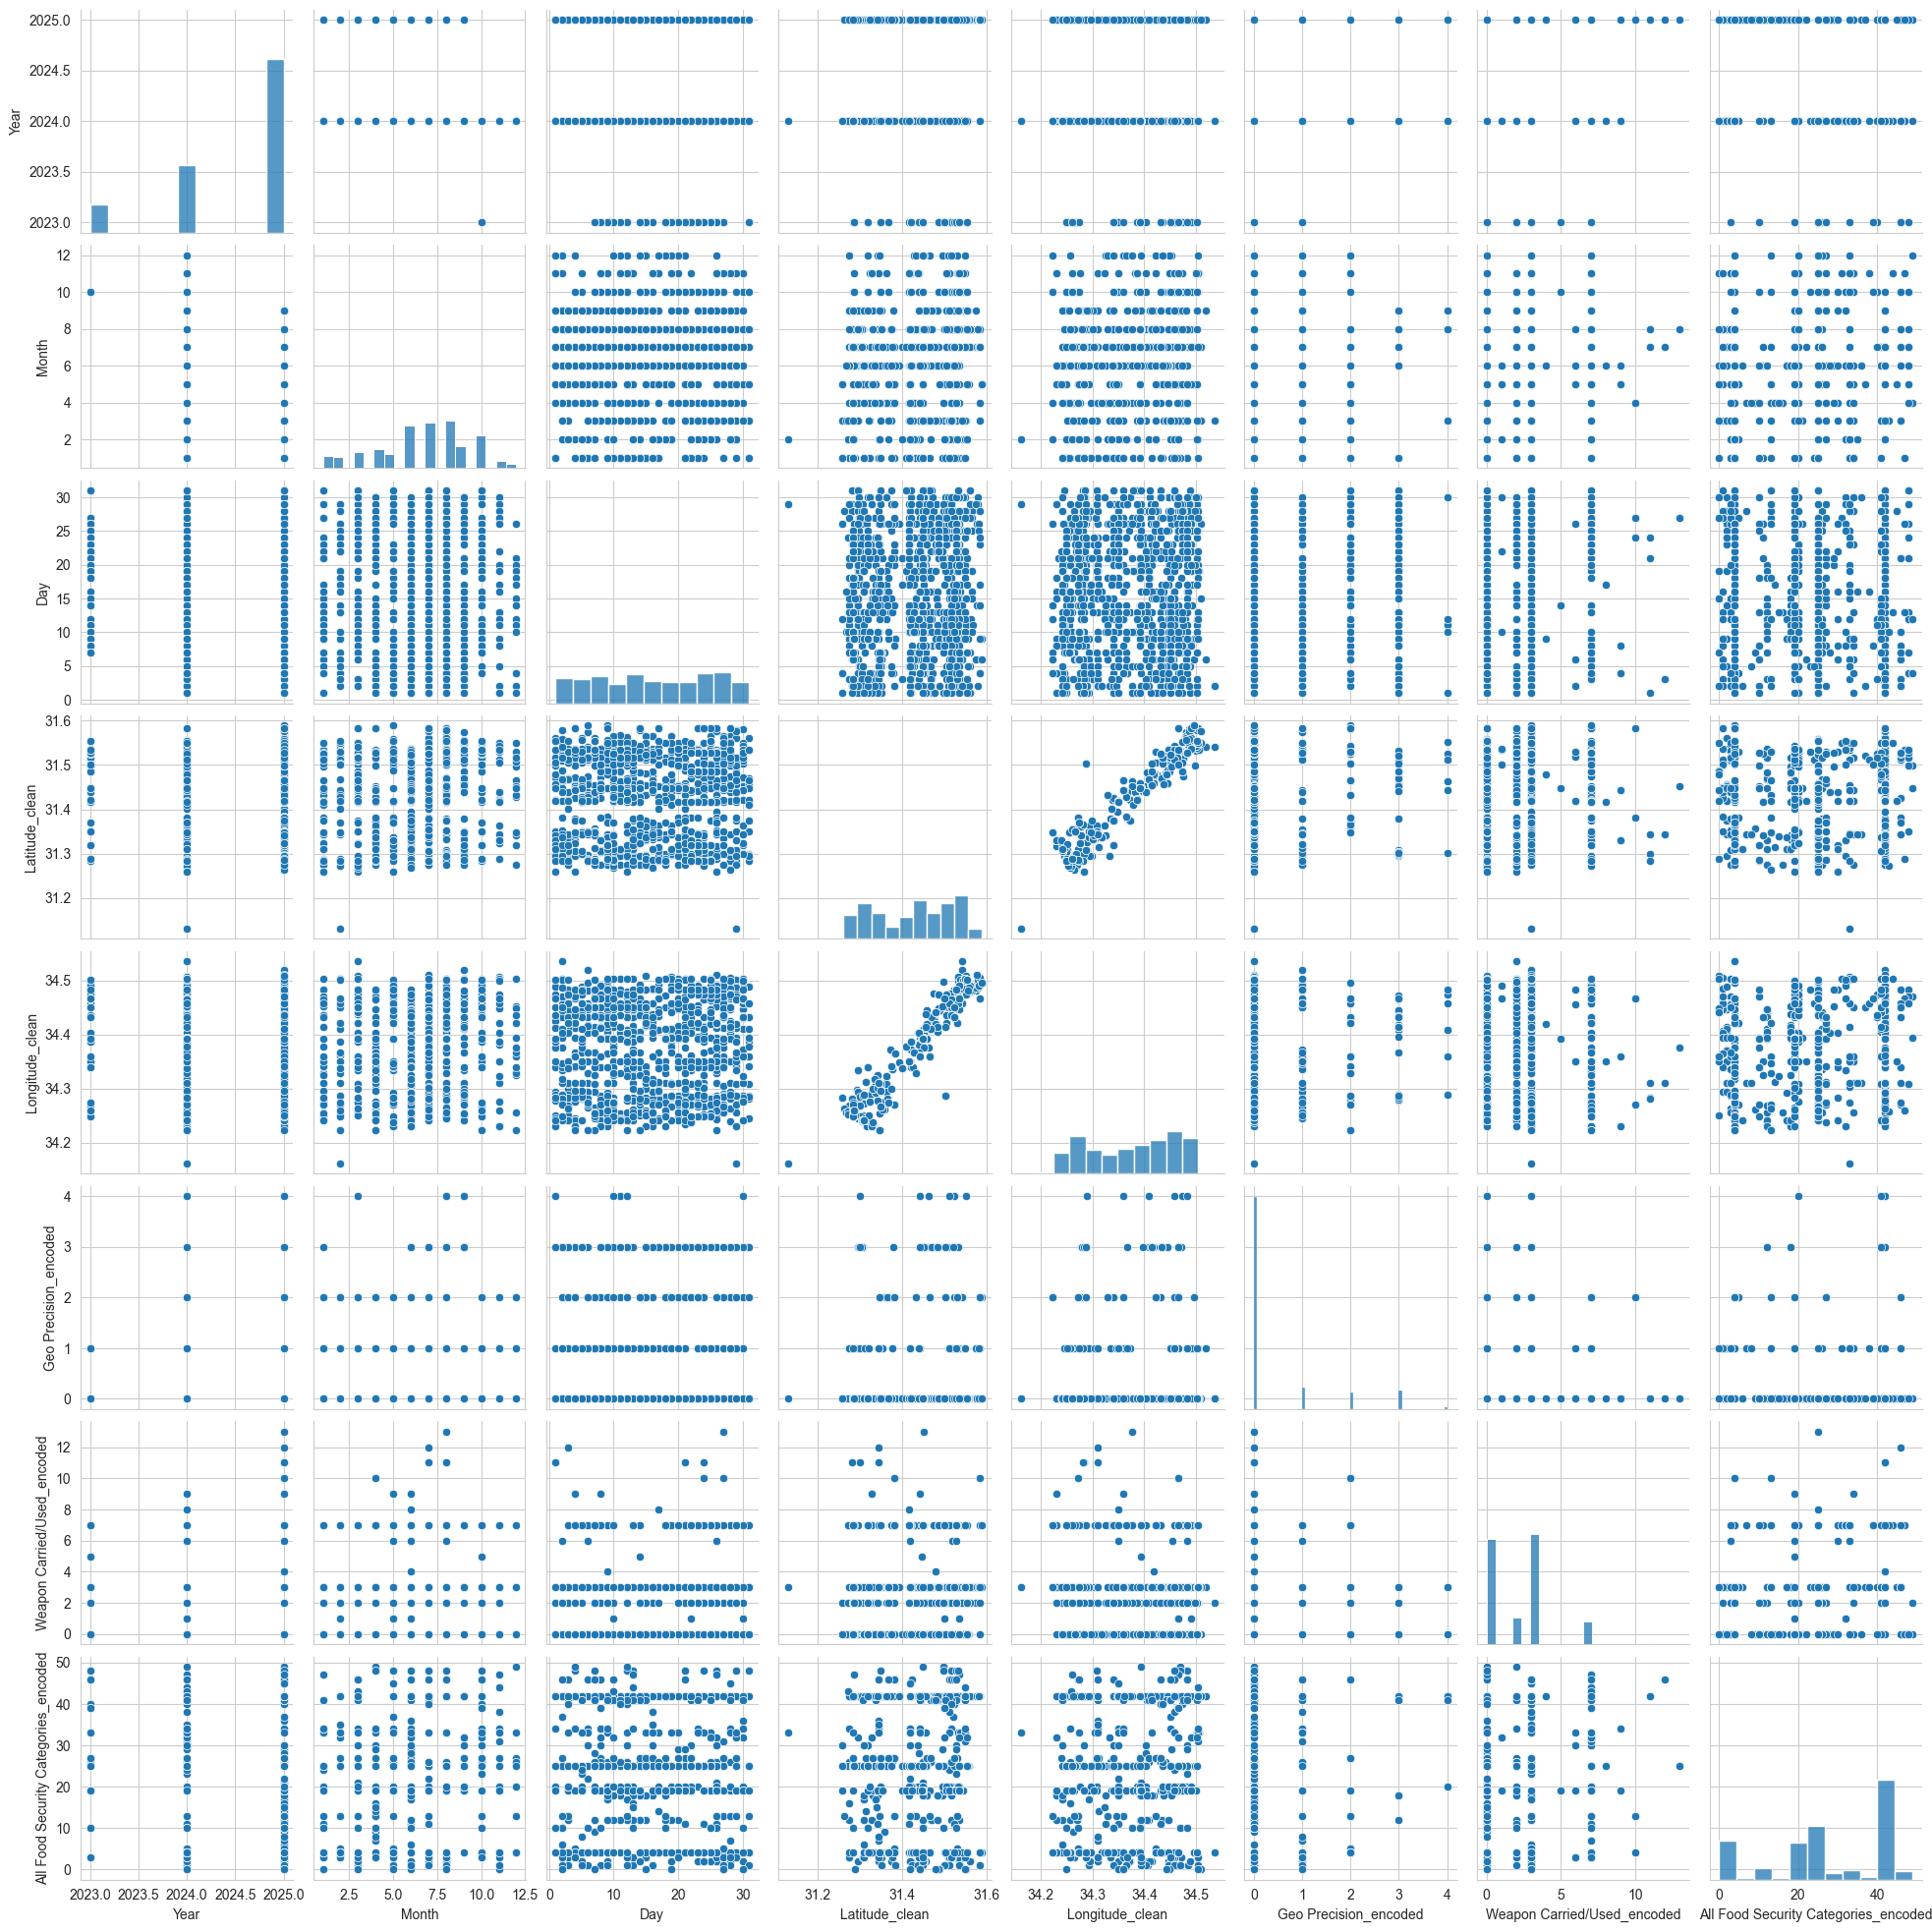

In [260]:
sns.pairplot(df_food)

## **Displaying correlation among all the columns using Heat Map**

In [262]:
df_food.corr(numeric_only=True)

,Year,Month,Day,Latitude_clean,Longitude_clean,Geo Precision_encoded,Weapon Carried/Used_encoded,All Food Security Categories_encoded
Year,1.000000,-0.272826,-0.095291,-0.040018,-0.067507,0.156585,-0.077479,0.214266
Month,-0.272826,1.000000,0.064722,0.028661,0.085960,-0.000465,0.133318,0.186025
Day,-0.095291,0.064722,1.000000,0.008620,0.033762,-0.020422,0.101402,-0.016581
Latitude_clean,-0.040018,0.028661,0.008620,1.000000,0.940803,-0.024676,-0.073039,-0.080888
Longitude_clean,-0.067507,0.085960,0.033762,0.940803,1.000000,-0.073220,-0.106115,0.008282
Geo Precision_encoded,0.156585,-0.000465,-0.020422,-0.024676,-0.073220,1.000000,0.171312,0.067428
Weapon Carried/Used_encoded,-0.077479,0.133318,0.101402,-0.073039,-0.106115,0.171312,1.000000,0.136749
All Food Security Categories_encoded,0.214266,0.186025,-0.016581,-0.080888,0.008282,0.067428,0.136749,1.000000


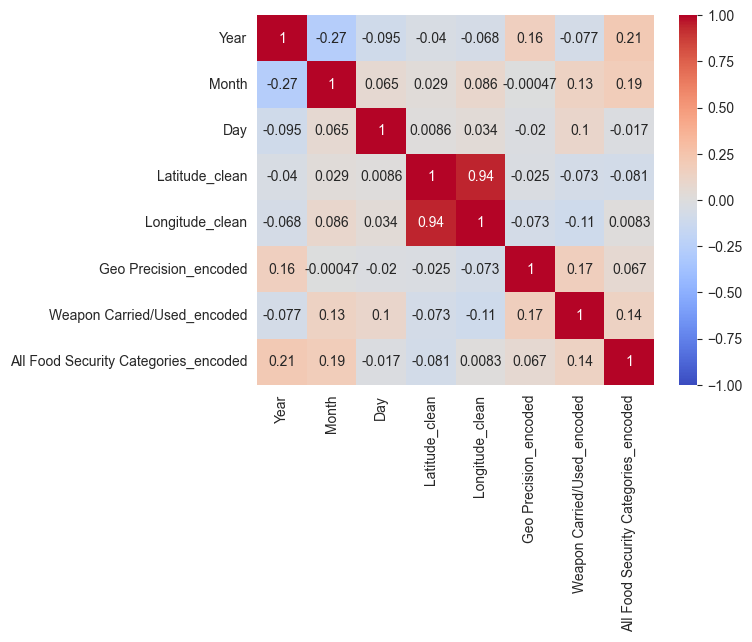

In [263]:
sns.heatmap(df_food.corr(numeric_only=True), annot=True, vmin=-1, cmap='coolwarm');

## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [ ]:
lm = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [ ]:
X_train = df.drop("target", axis = "columns")[0:-20]
y_train = df["target"][:-20]
X_test = df.drop("target", axis = "columns")[-20:]
y_test = df["target"][-20:]

KeyError: "['target'] not found in axis"

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(422, 10)
(422,)
(20, 10)
(20,)


In [ ]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
X = df.drop("target", axis = "columns")
y = df["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle= False)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(422, 10)
(422,)
(20, 10)
(20,)


Perform a brief exploratory analysis to investigate the conditions necessary for linear regression. This analysis will help you understand the distribution of the target variable and its correlations with other features.

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

y = a + b*x1 + c*x2 + d*x3 + ....

In [ ]:
lm.intercept_

np.float64(152.76429169049118)

In [ ]:
lm.coef_

array([ 3.06094248e-01, -2.37635570e+02,  5.10538048e+02,  3.27729878e+02,
       -8.14111926e+02,  4.92799595e+02,  1.02841240e+02,  1.84603496e+02,
        7.43509388e+02,  7.60966464e+01])

In [ ]:
pred = lm.predict(X_test)
pred

array([197.61898486, 155.44031962, 172.88875144, 111.53270645,
       164.79397301, 131.06765869, 259.12441219, 100.47873746,
       117.06005372, 124.30261597, 218.36868146,  61.19581944,
       132.24837933, 120.33293546,  52.54513009, 194.03746764,
       102.5756431 , 123.56778709, 211.03465323,  52.60221696])

#### Print your `diabetes_target_test` and compare with the prediction. 

In [ ]:
y_test

422                                                 233.0
423                                                  91.0
424                                                 111.0
425                                                 152.0
426                                                 120.0
427                                                  67.0
428                                                 310.0
429                                                  94.0
430                                                 183.0
431                                                  66.0
432                                                 173.0
433                                                  72.0
434                                                  49.0
435                                                  64.0
436                                                  48.0
437                                                 178.0
438                                                 104.0
439           

In [ ]:
df_final = pd.DataFrame(y_test.values, columns=["Target"])
df_final["pred"] = pred
df_final

,Target,pred
0,233.0,197.618985
1,91.0,155.440320
2,111.0,172.888751
3,152.0,111.532706
4,120.0,164.793973
5,67.0,131.067659
6,310.0,259.124412
7,94.0,100.478737
8,183.0,117.060054
9,66.0,124.302616


#### Is `diabetes_target_test` exactly the same as the model prediction? Use different error metrics

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, pred))
print("MSE: ", metrics.mean_squared_error(y_test, pred))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, pred))
print("RMSE: ", metrics.mean_squared_error(y_test, pred) ** 0.5)

MAE:  36.60961865545879
MSE:  2004.5186863342092
MAPE:  0.3930876102873051
RMSE:  44.77185149548999


#  _________________________________________________

In [ ]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
# todas las variables.

X = df.drop("target", axis = "columns")
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 20, shuffle= False)


lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)

print("MAE: ", metrics.mean_absolute_error(y_test, pred))
print("MSE: ", metrics.mean_squared_error(y_test, pred))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, pred))
print("RMSE: ", metrics.mean_squared_error(y_test, pred) ** 0.5)

MAE:  36.60961865545879
MSE:  2004.5186863342092
MAPE:  0.3930876102873051
RMSE:  44.77185149548999


In [ ]:
intercept = lm.intercept_
features = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient'])
features.sort_values('coefficient', ascending=False)

,coefficient
s5,743.509388
bmi,510.538048
s2,492.799595
bp,327.729878
s4,184.603496
s3,102.841240
s6,76.096646
age,0.306094
sex,-237.635570
s1,-814.111926


In [ ]:
# menos variables
X = df[["bmi", "bp", "s2", "s5"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 20, shuffle= False)


lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)

print("MAE: ", metrics.mean_absolute_error(y_test, pred))
print("MSE: ", metrics.mean_squared_error(y_test, pred))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, pred))
print("RMSE: ", metrics.mean_squared_error(y_test, pred) ** 0.5)

MAE:  36.45988827735319
MSE:  2000.7939936491553
MAPE:  0.4056112392592547
RMSE:  44.730235787989706


In [ ]:
intercept = lm.intercept_
features = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient'])
features.head().sort_values('coefficient', ascending=False)